In [1]:
import numpy as np
import pandas as pd

## Groupby Object

it only applicable on categorical column of data not on numerical column of data

In [4]:
movies = pd.read_csv("imdb-top-1000.csv")
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0


In [5]:
genre = movies.groupby("Genre") # syntax of creating group by 

In [6]:
#we can apply builtin aggretion fuction like mean/max/std and many more
genre.sum(numeric_only = True) #by this it only apply on numerical data column not categorical data column otherwise it apply on all column

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,22196,1367.3,72282412,3.263226e+10,10499.0
Adventure,9656,571.5,22576163,9.496922e+09,5020.0
Animation,8166,650.3,21978630,1.463147e+10,6082.0
Biography,11970,698.6,24006844,8.276358e+09,6023.0
Comedy,17380,1224.7,27620327,1.566387e+10,9840.0
Crime,13524,857.8,33533615,8.452632e+09,6706.0
Drama,36049,2299.7,61367304,3.540997e+10,19208.0
Family,215,15.6,551221,4.391106e+08,158.0
Fantasy,170,16.0,146222,7.827267e+08,0.0


In [7]:
#find top 3 genre by total earning
genre.sum(numeric_only=True)["Gross"].sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [8]:
#find the genre with highest avg ImDB rating
genre.mean(numeric_only=True)["IMDB_Rating"].sort_values(ascending=False).head(1)

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64

In [9]:
genre["IMDB_Rating"].mean().sort_values(ascending=False).head(1) #it is effcient way first get a column then perfrom a operation

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64

In [10]:
#find director with most popularity here we consider a no. of votes as popularity
movies.groupby("Director")["No_of_Votes"].sum().sort_values(ascending = False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

In [11]:
#find the highest rated movie of each genre #not correct
movies.groupby("Genre")[["Series_Title","IMDB_Rating"]].max()

,Series_Title,IMDB_Rating
Genre,,
Action,Yôjinbô,9.0
Adventure,Zombieland,8.6
Animation,Ôkami kodomo no Ame to Yuki,8.6
Biography,Zerkalo,8.9
Comedy,Zindagi Na Milegi Dobara,8.6
Crime,À bout de souffle,9.2
Drama,Zwartboek,9.3
Family,Willy Wonka & the Chocolate Factory,7.8
Fantasy,Nosferatu,8.1


In [12]:
#find number of movies done by each actor
movies.groupby("Star1")["Series_Title"].count()

Star1
Aamir Khan              7
Aaron Taylor-Johnson    1
Abhay Deol              1
Abraham Attah           1
Adam Driver             1
                       ..
Zbigniew Zamachowski    1
Zooey Deschanel         1
Çetin Tekindor          1
Éric Toledano           1
Ömer Faruk Sorak        1
Name: Series_Title, Length: 660, dtype: int64

**Groupby method and Atrribute**

1)len()

In [15]:
#find the total number of groups -> len
len(movies.groupby("Genre"))

14

2)size()

In [17]:
#find items in each group -> size i.e it gives how many rows one group consist
movies.groupby("Genre").size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

3)first()/last()/nth()

In [19]:
#fist()/last()/nth()  // first() - it gives first row of  each group , last() - viceversa , nth - gives you which row you want
genre.first()
genre.last()
genre.nth(4)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
13,The Lord of the Rings: The Two Towers,2002,179,Action,8.7,Peter Jackson,Elijah Wood,1485555,342551365.0,87.0
20,Soorarai Pottru,2020,153,Drama,8.6,Sudha Kongara,Suriya,54995,556832648.0,NaN
22,Cidade de Deus,2002,130,Crime,8.6,Fernando Meirelles,Kátia Lund,699256,7563397.0,79.0
38,The Pianist,2002,150,Biography,8.5,Roman Polanski,Adrien Brody,729603,32572577.0,85.0
58,Spider-Man: Into the Spider-Verse,2018,117,Animation,8.4,Bob Persichetti,Peter Ramsey,375110,190241310.0,87.0
64,3 Idiots,2009,170,Comedy,8.4,Rajkumar Hirani,Aamir Khan,344445,6532908.0,67.0
114,2001: A Space Odyssey,1968,149,Adventure,8.3,Stanley Kubrick,Keir Dullea,603517,56954992.0,84.0
220,Kahaani,2012,122,Mystery,8.1,Sujoy Ghosh,Vidya Balan,57806,1035953.0,NaN
544,Night of the Living Dead,1968,96,Horror,7.9,George A. Romero,Duane Jones,116557,89029.0,89.0


4)get_group

In [21]:
#it gives group,we want
genre.get_group("Mystery")

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
69,Memento,2000,113,Mystery,8.4,Christopher Nolan,Guy Pearce,1125712,25544867.0,80.0
81,Rear Window,1954,112,Mystery,8.4,Alfred Hitchcock,James Stewart,444074,36764313.0,100.0
119,Vertigo,1958,128,Mystery,8.3,Alfred Hitchcock,James Stewart,364368,3200000.0,100.0
145,Shutter Island,2010,138,Mystery,8.2,Martin Scorsese,Leonardo DiCaprio,1129894,128012934.0,63.0
220,Kahaani,2012,122,Mystery,8.1,Sujoy Ghosh,Vidya Balan,57806,1035953.0,NaN
393,Twelve Monkeys,1995,129,Mystery,8.0,Terry Gilliam,Bruce Willis,578443,57141459.0,74.0
420,Sleuth,1972,138,Mystery,8.0,Joseph L. Mankiewicz,Laurence Olivier,44748,4081254.0,NaN
714,The Lady Vanishes,1938,96,Mystery,7.8,Alfred Hitchcock,Margaret Lockwood,47400,474203697.0,98.0
829,Spoorloos,1988,107,Mystery,7.7,George Sluizer,Bernard-Pierre Donnadieu,33982,367916835.0,NaN
899,El cuerpo,2012,112,Mystery,7.6,Oriol Paulo,Jose Coronado,57549,140340673.0,NaN


5)describe()

In [23]:
genre.describe()

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

6)sample()              
it give one row from each column

In [25]:
genre.sample()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
685,Ghostbusters,1984,105,Action,7.8,Ivan Reitman,Bill Murray,355413,238632124.0,71.0
692,The Man Who Would Be King,1975,129,Adventure,7.8,John Huston,Sean Connery,44917,335861628.0,91.0
902,Kari-gurashi no Arietti,2010,94,Animation,7.6,Hiromasa Yonebayashi,Amy Poehler,80939,19202743.0,80.0
54,Ayla: The Daughter of War,2017,125,Biography,8.4,Can Ulkay,Erdem Can,34112,679278040.0,NaN
52,City Lights,1931,87,Comedy,8.5,Charles Chaplin,Charles Chaplin,167839,19181.0,99.0
767,Zodiac,2007,157,Crime,7.7,David Fincher,Jake Gyllenhaal,466080,33080084.0,78.0
344,The Perks of Being a Wallflower,2012,103,Drama,8.0,Stephen Chbosky,Logan Lerman,462252,17738570.0,67.0
698,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
456,The Maltese Falcon,1941,100,Film-Noir,8.0,John Huston,Humphrey Bogart,148928,2108060.0,96.0


7)nunique()          
it count how many unique values in in each group

In [27]:
genre.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


**Agrregate Method**                      
it only applicable on numeric column

In [29]:
#it gives flexibility to apply aggregate method(min,max,sum .. ) on each group of column 
#by dict
genre.agg ({
    "Runtime" : "sum",
    "IMDB_Rating" : "max",
    "Gross" : "min"
}) # in this first for columns in group as key and value is whhat operation we want to perform

,Runtime,IMDB_Rating,Gross
Genre,,,
Action,22196,9.0,3296.0
Adventure,9656,8.6,61001.0
Animation,8166,8.6,128985.0
Biography,11970,8.9,21877.0
Comedy,17380,8.6,1305.0
Crime,13524,9.2,6013.0
Drama,36049,9.3,3600.0
Family,215,7.8,4000000.0
Fantasy,170,8.1,337574718.0


In [30]:
#by list 
genre[["Runtime","IMDB_Rating","Gross"]].agg(["sum","max","min"]) 
# first part for coulumns in group and second part perform what we want to perform on each column

Runtime           IMDB_Rating                   Gross               \
              sum  max  min         sum  max  min           sum          max   
Genre                                                                          
Action      22196  321   45      1367.3  9.0  7.6  3.263226e+10  936662225.0   
Adventure    9656  228   88       571.5  8.6  7.6  9.496922e+09  874211619.0   
Animation    8166  137   71       650.3  8.6  7.6  1.463147e+10  873839108.0   
Biography   11970  209   93       698.6  8.9  7.6  8.276358e+09  753585104.0   
Comedy      17380  188   68      1224.7  8.6  7.6  1.566387e+10  886752933.0   
Crime       13524  229   80       857.8  9.2  7.6  8.452632e+09  790482117.0   
Drama       36049  242   64      2299.7  9.3  7.6  3.540997e+10  924558264.0   
Family        215  115  100        15.6  7.8  7.8  4.391106e+08  435110554.0   
Fantasy       170   94   76        16.0  8.1  7.9  7.827267e+08  445151978.0   
Film-Noir     312  108  100        23.9  8.1  7.8  1.259105e+08  123353292.0   
Horror       1123  122   71        87.0  8.5  7.6  1.034649e+09  298791505.0   
Mystery      1429  138   96        95.7  8.4  7.6  1.256417e+09  474203697.0   
Thriller      108  108  108         7.8  7.8  7.8  1.755074e+07   17550741.0   
Western       593  165  132        33.4  8.8  7.8  5.822151e+07   31800000.0   

                        
                   min  
Genre                   
Action          3296.0  
Adventure      61001.0  
Animation     128985.0  
Biography      21877.0  
Comedy          1305.0  
Crime           6013.0  
Drama           3600.0  
Family       4000000.0  
Fantasy    337574718.0  
Film-Noir     449191.0  
Horror         89029.0  
Mystery      1035953.0  
Thriller    17550741.0  
Western      5321508.0

In [31]:
#by both method
genre.agg(
    {
    "Runtime" : ["sum","mean","max"],
    "IMDB_Rating" : ["max","sum"],
    "Gross" : ["min","sum","std"]
    })
#key part for columns and value part for what operation we want to perform on each column       

Runtime                  IMDB_Rating                Gross  \
              sum        mean  max         max     sum          min   
Genre                                                                 
Action      22196  129.046512  321         9.0  1367.3       3296.0   
Adventure    9656  134.111111  228         8.6   571.5      61001.0   
Animation    8166   99.585366  137         8.6   650.3     128985.0   
Biography   11970  136.022727  209         8.9   698.6      21877.0   
Comedy      17380  112.129032  188         8.6  1224.7       1305.0   
Crime       13524  126.392523  229         9.2   857.8       6013.0   
Drama       36049  124.737024  242         9.3  2299.7       3600.0   
Family        215  107.500000  115         7.8    15.6    4000000.0   
Fantasy       170   85.000000   94         8.1    16.0  337574718.0   
Film-Noir     312  104.000000  108         8.1    23.9     449191.0   
Horror       1123  102.090909  122         8.5    87.0      89029.0   
Mystery      1429  119.083333  138         8.4    95.7    1035953.0   
Thriller      108  108.000000  108         7.8     7.8   17550741.0   
Western       593  148.250000  165         8.8    33.4    5321508.0   

                                       
                    sum           std  
Genre                                  
Action     3.263226e+10  2.256724e+08  
Adventure  9.496922e+09  1.697543e+08  
Animation  1.463147e+10  2.091840e+08  
Biography  8.276358e+09  1.363251e+08  
Comedy     1.566387e+10  1.946513e+08  
Crime      8.452632e+09  1.571191e+08  
Drama      3.540997e+10  2.201164e+08  
Family     4.391106e+08  3.048412e+08  
Fantasy    7.827267e+08  7.606861e+07  
Film-Noir  1.259105e+08  7.048472e+07  
Horror     1.034649e+09  9.965017e+07  
Mystery    1.256417e+09  1.567524e+08  
Thriller   1.755074e+07           NaN  
Western    5.822151e+07  1.230626e+07

apply()              
it apply for all column in group of data

In [33]:
#find the number of movies strted with A for each group
genre["Series_Title"].apply(lambda x : x.str.startswith("A")).sum() #it apply for all group simultaneously

63

In [34]:
def A(group):
    return group["Series_Title"].str.startswith("A").sum()

genre.apply(A,include_groups = False) #it apply for each group

Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

In [35]:
 # find ranking of each movie in the group according to IMDB score
def imdb(group):
    group["rank"]=group["IMDB_Rating"].rank(ascending=False)
    return group
genre.apply(imdb,include_groups=False)

Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime  IMDB_Rating           Director              Star1  \
Genre                                                                      
Action   2        152          9.0  Christopher Nolan     Christian Bale   
         5        201          8.9      Peter Jackson        Elijah Wood   
         8        148          8.8  Christopher Nolan  Leonardo DiCaprio   
         10       178          8.8      Peter Jackson        Elijah Wood   
         13       179          8.7      Peter Jackson        Elijah Wood   
...               ...          ...                ...                ...   
Thriller 700      108          7.8      Terence Young     Audrey Hepburn   
Western  12       161          8.8       Sergio Leone     Clint Eastwood   
         48       165          8.5       Sergio Leone        Henry Fonda   
         115      132          8.3       Sergio Leone     Clint Eastwood   
         691      135          7.8     Clint Eastwood     Clint Eastwood   

              No_of_Votes        Gross  Metascore  rank  
Genre                                                    
Action   2        2303232  534858444.0       84.0   1.0  
         5        1642758  377845905.0       94.0   2.0  
         8        2067042  292576195.0       74.0   3.5  
         10       1661481  315544750.0       92.0   3.5  
         13       1485555  342551365.0       87.0   6.0  
...                   ...          ...        ...   ...  
Thriller 700        27733   17550741.0       81.0   1.0  
Western  12        688390    6100000.0       90.0   1.0  
         48        302844    5321508.0       80.0   2.0  
         115       232772   15000000.0       74.0   3.0  
         691        65659   31800000.0       69.0   4.0  

[1000 rows x 10 columns]

In [36]:
# find normalized IMDB rating group wise
def norma(group):
    y =group["IMDB_Rating"]
    group["Nor_Rank"] = (y-min(y))/(max(y)-min(y))
                                                                   
    return group

In [37]:
genre.apply(norma)

C:\Users\HP\AppData\Local\Temp\ipykernel_11404\4204611421.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(norma)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  Nor_Rank  
Genre                                                                           
Action   2       Christian Bale      2303232  534858444.0       84.0  1.000000  
         5          Elijah Wood      1642758  377845905.0       94.0  0.928571  
         8    Leonardo DiCaprio      2067042  292576195.0       74.0  0.857143  
         10         Elijah Wood      1661481  315544750.0       92.0  0.857143  
         13         Elijah Wood      1485555  342551365.0       87.0  0.785714  
...                         ...          ...          ...        ...       ...  
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0       NaN  
Western  12      Clint Eastwood       688390    6100000.0       90.0  1.000000  
         48         Henry Fonda       302844    5321508.0       80.0  0.700000  
         115     Clint Eastwood       232772   15000000.0       74.0  0.500000  
         691     Clint Eastwood        65659   31800000.0       69.0  0.000000  

[1000 rows x 11 columns]

**groupby on multiple cols**

In [39]:
duo = movies.groupby(["Director","Star1"]) #syntax of creting groupby by passing two columns

In [40]:
duo.get_group(("Aamir Khan","Amole Gupte")) #we can get any group by passing pair

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
65,Taare Zameen Par,2007,165,Drama,8.4,Aamir Khan,Amole Gupte,168895,1223869.0,NaN


In [41]:
#find the most earning actor -- director combo
duo["Gross"].sum().sort_values(ascending=False).head(1)

Director        Star1         
Akira Kurosawa  Toshirô Mifune    2.999877e+09
Name: Gross, dtype: float64

In [42]:
# find the best(in-terms of metascore(avg)) actor -- genre combo
a = movies.groupby(["Star1","Genre"])
a["Metascore"].mean().sort_values(ascending=False)

Star1             Genre  
Ellar Coltrane    Drama      100.0
Humphrey Bogart   Drama      100.0
James Stewart     Mystery    100.0
Bertil Guve       Drama      100.0
Orson Welles      Drama      100.0
                             ...  
William Holden    Drama        NaN
Won Bin           Action       NaN
Yash              Action       NaN
Çetin Tekindor    Drama        NaN
Ömer Faruk Sorak  Comedy       NaN
Name: Metascore, Length: 829, dtype: float64

In [43]:
#agg function same work as single columns

In [44]:
ipl = pd.read_csv("deliveries.csv")
ipl

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [45]:
 # find the top 10 batsman in terms of runs
ipl.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

## Merging, Joining & Concatenating

In [47]:
courses = pd.read_csv("data/courses.csv")
students = pd.read_csv("data/students.csv")
nov = pd.read_csv("data/reg-month1.csv")
dec = pd.read_csv("data/reg-month2.csv")
matches = pd.read_csv("data/matches.csv")
delivery = pd.read_csv("data/deliveries.csv")

1]pd.concat()                   
it connnect to data frame 

In [49]:
#it connect vertically
pd.concat([nov,dec]) #syntax of concat , we have to pass aur data frame in list 
#but here index all add as it is 
regs = pd.concat([nov,dec],ignore_index = True) #ignore_index parameter ignore the index index and give index for all in serial
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [50]:
#it connect horizontally 
# but number of rows are equal to the number of row who has heigher row
# and if one data frame has less row then for other row it store nan values
reg = pd.concat([nov,dec],axis=1)
reg

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


2]MultiIndexing In Data frame               
if we have to keep indexing of old dataframe and also add new indexing to differentiate then multiindexing is used       
syntax  :             
pd.concat([datframe1,dataframe2],keys=("index1","index2"))

In [52]:
multi = pd.concat([nov,dec],keys=("m1","m2"))
multi

student_id  course_id
m1 0           23          1
   1           15          5
   2           18          6
   3           23          4
   4           16          9
   5           18          1
   6            1          1
   7            7          8
   8           22          3
   9           15          1
   10          19          4
   11           1          6
   12           7         10
   13          11          7
   14          13          3
   15          24          4
   16          21          1
   17          16          5
   18          23          3
   19          17          7
   20          23          6
   21          25          1
   22          19          2
   23          25         10
   24           3          3
m2 0            3          5
   1           16          7
   2           12         10
   3           12          1
   4           14          9
   5            7          7
   6            7          2
   7           16          3
   8           17         10
   9           11          8
   10          14          6
   11          12          5
   12          12          7
   13          18          8
   14           1         10
   15           1          9
   16           2          5
   17           7          6
   18          22          5
   19          22          6
   20          23          9
   21          23          5
   22          14          4
   23          14          1
   24          11         10
   25          42          9
   26          50          8
   27          38          1

In [53]:
#how to fetch 
multi.loc[("m1",3)] # here we can access the row of data by passing indexing first part for first index and second for second index

student_id    23
course_id      4
Name: (m1, 3), dtype: int64

**merge()**           
it is apply when at leat one common column is present 

1]inner join                      
it merge  dataframe on the basis of one common  column                                    
it show data  i.e how many data common contain by left table 

In [56]:
students.merge(regs,how="inner",on="student_id")  
# it show result according to a left table
# here students - left table
# regs - right table
# how - which operation we have to perform inner/outer/left/right
# on - on which common colun we want to perform operation

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


2]left join            
it join data frame on the basis of same column       
it must show all data of left table and for right table it show data which is common          

In [58]:
courses.merge(regs,how="left",on="course_id")

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


3]right join          
it must show all data of right table for left table it show data which is common             

In [60]:
courses.merge(regs,how="right",on="course_id")

,course_id,course_name,price,student_id
0,1,python,2499,23
1,5,tableau,2499,15
2,6,power bi,1899,18
3,4,machine learning,9999,23
4,9,plotly,699,16
5,1,python,2499,18
6,1,python,2499,1
7,8,pandas,1099,7
8,3,data analysis,4999,22
9,1,python,2499,15


4]outer join          
it show all data 

In [62]:
students.merge(regs,how="outer",on="student_id")

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
5,3,Parveen Bhalla,3.0,3.0
6,3,Parveen Bhalla,3.0,5.0
7,4,Marlo Dugal,14.0,NaN
8,5,Kusum Bahri,6.0,NaN
9,6,Lakshmi Contractor,10.0,NaN


In [63]:
# find total revenue generated
courses.merge(regs,how="inner",on="course_id")["price"].sum()

154247

In [64]:
# find month by month revenue
df = pd.concat([nov,dec],keys=("nov","dec")).reset_index() 
df.merge(courses,on="course_id").groupby("level_0")["price"].sum() # how = "inner",by default

level_0
dec    65072
nov    89175
Name: price, dtype: int64

In [65]:
#Print the registration table ->col -> name -> course -> price
students.merge(regs,on="student_id").merge(courses,on="course_id")[["name","course_name","price"]]
		

,name,course_name,price
0,Kailash Harjo,python,2499
1,Kailash Harjo,power bi,1899
2,Kailash Harjo,pyspark,2499
3,Kailash Harjo,plotly,699
4,Esha Butala,tableau,2499
5,Parveen Bhalla,data analysis,4999
6,Parveen Bhalla,tableau,2499
7,Tarun Thaker,pandas,1099
8,Tarun Thaker,pyspark,2499
9,Tarun Thaker,ms sxcel,1599


<Axes: xlabel='course_name'>

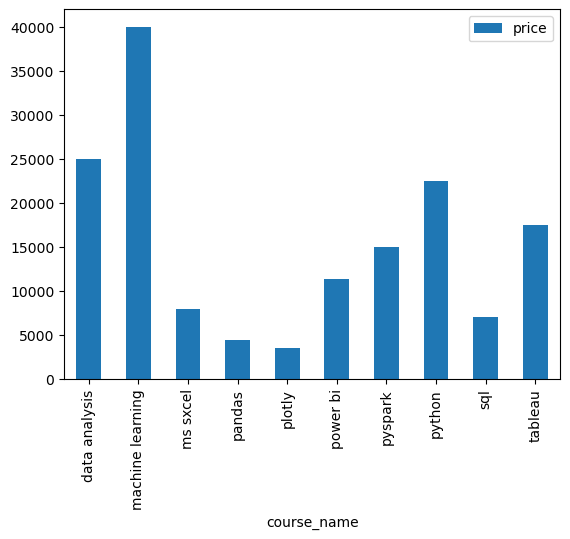

In [66]:
# Plot bar chart for revenue/course
courses.merge(regs,on="course_id")[["course_name","price"]].groupby("course_name").sum().plot(kind="bar")

In [67]:
#. find students who enrolled in both the months
a = nov["student_id"]
b = dec["student_id"]
c = np.intersect1d(a,b) #it gives cooman student_id 
students[students["student_id"].isin(c)] # isin check the student id is present in students or not

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [68]:
# find course that got no enrollment
courses[~(courses["course_id"].isin(regs["course_id"]))]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [69]:
# find students who did not enroll into any courses
students[~(students["student_id"].isin(regs["student_id"]))]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11


##self join

In [71]:
# Print student name -- partner name for all enrolled students
students.merge(students,how="inner",left_on="partner",right_on="student_id")

,student_id_x,name_x,partner_x,student_id_y,name_y,partner_y
0,1,Kailash Harjo,23,23,Chhavi Lachman,18
1,2,Esha Butala,1,1,Kailash Harjo,23
2,3,Parveen Bhalla,3,3,Parveen Bhalla,3
3,4,Marlo Dugal,14,14,Pranab Natarajan,22
4,5,Kusum Bahri,6,6,Lakshmi Contractor,10
5,6,Lakshmi Contractor,10,10,Aayushman Sant,8
6,7,Tarun Thaker,9,9,Nitika Chatterjee,4
7,8,Radheshyam Dey,5,5,Kusum Bahri,6
8,9,Nitika Chatterjee,4,4,Marlo Dugal,14
9,10,Aayushman Sant,8,8,Radheshyam Dey,5


In [72]:
# find top 3 students who did most number enrollments
students.merge(regs["student_id"],on = "student_id")["name"].value_counts().head(3) # problem on this approch name can repeated

name
Chhavi Lachman    6
Tarun Thaker      5
Kailash Harjo     4
Name: count, dtype: int64

In [73]:
students.merge(regs,on="student_id").groupby(["student_id","name"])["name"].value_counts().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: count, dtype: int64

In [74]:
# find top 3 students who spent most amount of money on courses
students.merge(regs,on="student_id").merge(courses,on="course_id").groupby(["name"]).sum()['price'].sort_values(ascending=False).head(3)

name
Chhavi Lachman      22594
Pranab Natarajan    15096
Qabeel Raman        13498
Name: price, dtype: int64

In [75]:
students.merge(regs,on="student_id").merge(courses,on="course_id").groupby(["student_id","name"])["price"].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

#alternate syntax of concanating

In [77]:
pd.merge(students,regs,how="inner",on="student_id").sample()
#here student is left table and regs is right table 

,student_id,name,partner,course_id
13,11,David Mukhopadhyay,20,8


In [78]:
# find top 3 stadiums with highest sixes/match ratio 


In [79]:
a = delivery.rename(columns={"match_id":"id"}).merge(matches,how="left",on="id").groupby(["venue"])["batsman_runs"].value_counts().reset_index()

In [80]:
b  = matches["venue"].value_counts().reset_index()

In [81]:
d = a.merge(b,how="inner",on="venue")[a.merge(b,how="inner",on="venue")["batsman_runs"] == 6]
d["ratio"] = d["count_x"]/d["count_y"]

In [82]:
d[["venue","ratio"]].sort_values("ratio",ascending=False).head(3)

,venue,ratio
72,Holkar Cricket Stadium,17.600000
90,M Chinnaswamy Stadium,13.227273
181,Sharjah Cricket Stadium,12.666667


In [83]:
# find orange cap holder of all the seasons
delivery.rename(columns={"match_id":"id"},inplace=True)
a=matches.merge(delivery,on="id").groupby(["season","batsman"]).sum("total_runs").sort_values("total_runs",ascending=False)["total_runs"].reset_index()
a.sort_values("total_runs",ascending=False).drop_duplicates("season",keep="first")

,season,batsman,total_runs
0,2016,V Kohli,998
2,2013,CH Gayle,778
3,2012,CH Gayle,762
6,2014,RV Uthappa,681
7,2017,DA Warner,670
8,2010,SR Tendulkar,665
10,2008,SE Marsh,644
11,2011,CH Gayle,638
12,2009,ML Hayden,626
17,2015,DA Warner,589


# Multiindexing Series and DataFrame

 how to create multiindexing 

1] from tuples

In [87]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val) #syntax
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

2] from product

In [89]:
mul = [["cse","ece"],[2019,2020,2021,2022,]] # we have to pass our data in 2D list
pd.MultiIndex.from_product(mul) #syntax

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

**creating series with multiindexing**

In [91]:
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [92]:
# how to fetch item
s[("cse",2021)] # for one row

3

In [93]:
s["cse"] #for all cse 

2019    1
2020    2
2021    3
2022    4
dtype: int64

**unstack()**             
it convert multiinindexing series in to data frame

In [95]:
temp = s.unstack()  # it convert outer index as index and inner index as columns 
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


**stack()**           
it convert data frame in to multiindexing data

In [97]:
temp.stack()  # it convert index as outer index and columns as inner index

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

**multiindex dataframe**

In [99]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)
branch_df1 #syntax

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [100]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2 #syntax

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [101]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [102]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

**In DataFrame**            
**unstack()**                 
it convert inner index in to inner column                           
**stack()**                                         
it convert inner column to inner index

In [104]:
#extracting a single row from data frame
branch_df3.loc[("cse",2020)]

delhi   avg_package    3
        students       4
mumbai  avg_package    0
        students       0
Name: (cse, 2020), dtype: int64

In [105]:
#extractting columns
branch_df3[("delhi","students")]

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: (delhi, students), dtype: int64

In [106]:
#Transpose of dataframe 
# it row as column and coulmn as row
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [107]:
#swap level 
# it swap the level i.e multiindexing
# axis = 1 for columns
branch_df3.swaplevel()
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


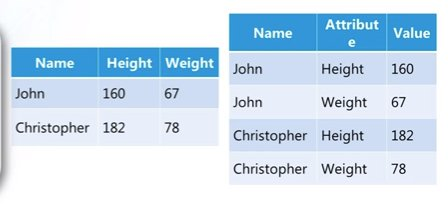



Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.

Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

**melt()**

In [111]:
# melt covert wide data to long data
sample = pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)
sample.melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,130
8,2021,80
9,2022,150


In [112]:
# if we want to do not covert any coulumn then 
sample.melt(id_vars=["branch"])

,branch,variable,value
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [113]:
# we can also name the variable and name
sample.melt(id_vars=["branch"],var_name="year",value_name="students")

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


**Pivot Table**                          
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [115]:
import seaborn as sns #importing seaborn just use data set 
df = sns.load_dataset("tips")

In [116]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [117]:
# pivot table provide a shortcut but we can also use groupby
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False )                                                    

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [118]:
# we can use aggfunc for different operation want perform
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False,aggfunc="sum") 

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


# Vectorized String Operations

In [120]:
df = pd.read_csv("titanic.csv")
s = df["Name"]
s

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [121]:
#common function 
# lower/upper/capitalize/title
s.str.lower()
s.str.upper()
s.str.capitalize()
s.str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [122]:
#strip() 
# strip fuction is used to remove extra spaces from string 
a = "              yogesh                "
print(a)
a.strip()

              yogesh                


'yogesh'

In [123]:
#split()
s.str.split(",").str.get(0) # str is used in pandas to address the content and here get give us every element in list

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

# | DateTime in Pandas |

**Time Stamp**

In [126]:
# creating time stamp 
pd.Timestamp("2024/10/5")

Timestamp('2024-10-05 00:00:00')

In [127]:
# varitions 
# we can also create by many method
pd.Timestamp("2024,10,5")
pd.Timestamp("2024-10-5")

Timestamp('2024-10-05 00:00:00')

In [128]:
# only year 
pd.Timestamp("2024")

Timestamp('2024-01-01 00:00:00')

In [129]:
# using text 
pd.Timestamp("5th October 2024")

Timestamp('2024-10-05 00:00:00')

In [130]:
# passing time also 
x  = pd.Timestamp("2024,10,2 22:43")
x

Timestamp('2024-02-01 22:43:00')

In [131]:
# using datatime provide by python
import datetime as dt 
dt.datetime(2024,10,23,9,55) # here 9:55 is time

datetime.datetime(2024, 10, 23, 9, 55)

In [132]:
# fetching attribute
x.year
x.month
x.day
x.hour
x.minute
x.second

0

**date time index**

a collection of pandas timestamp 

In [135]:
pd.DatetimeIndex(["2024/10/2","2024/5/10"])

DatetimeIndex(['2024-10-02', '2024-05-10'], dtype='datetime64[ns]', freq=None)

In [136]:
# using pyhton date time
pd.DatetimeIndex([dt.datetime(2024,10,2),dt.datetime(2024,10,5)])

DatetimeIndex(['2024-10-02', '2024-10-05'], dtype='datetime64[ns]', freq=None)

In [137]:
# using Time stamp 
pd.DatetimeIndex([pd.Timestamp("2024,10,2"),pd.Timestamp("2024,10,5")])

DatetimeIndex(['2024-02-01', '2024-05-01'], dtype='datetime64[ns]', freq=None)

**date_range fuction**

In [244]:
# generate daily dates in given a range
pd.date_range(start="2024/10/07",end="2024/10/30",freq="D") # D for to obtain dates # syntax

DatetimeIndex(['2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10',
               '2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14',
               '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18',
               '2024-10-19', '2024-10-20', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-26',
               '2024-10-27', '2024-10-28', '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', freq='D')

In [242]:
pd.date_range(start="2024/10/07",end="2024/10/30",freq="2D") # 2D for to obtain alternative dates

DatetimeIndex(['2024-10-07', '2024-10-09', '2024-10-11', '2024-10-13',
               '2024-10-15', '2024-10-17', '2024-10-19', '2024-10-21',
               '2024-10-23', '2024-10-25', '2024-10-27', '2024-10-29'],
              dtype='datetime64[ns]', freq='2D')

In [246]:
pd.date_range(start="2024/10/07",end="2024/10/30",freq="B") # B for only obtain business dates

DatetimeIndex(['2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10',
               '2024-10-11', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', freq='B')

In [248]:
# w - for one day in week
pd.date_range(start="2024/10/07",end="2024/10/30",freq="W")

DatetimeIndex(['2024-10-13', '2024-10-20', '2024-10-27'], dtype='datetime64[ns]', freq='W-SUN')

In [252]:
# ME - for month end 
pd.date_range(start="2024/10/07",end="2024/10/30",freq="ME")

DatetimeIndex([], dtype='datetime64[ns]', freq='ME')

In [254]:
# MS - for month start 
pd.date_range(start="2024/10/07",end="2024/10/30",freq="MS")

DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

In [260]:
# YE for year end
pd.date_range(start="2024/10/07",end="2024/10/30",freq="YE")

DatetimeIndex([], dtype='datetime64[ns]', freq='YE-DEC')

In [262]:
# YS for start date
pd.date_range(start="2024/10/07",end="2024/10/30",freq="YS")

DatetimeIndex([], dtype='datetime64[ns]', freq='YS-JAN')

In [268]:
# using period 
pd.date_range(start="2024/10/07",periods=10,freq="YS") # we can all over operation using period also

DatetimeIndex(['2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01',
               '2029-01-01', '2030-01-01', '2031-01-01', '2032-01-01',
               '2033-01-01', '2034-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

**to_datetime**                                   
it covert object in to date time in pandas

In [272]:
df = pd.read_csv("expense_data.csv")

In [290]:
s = df["Date"]
pd.to_datetime(s).dt.year
pd.to_datetime(s).dt.month
pd.to_datetime(s).dt.day

0       2
1       2
2       1
3       1
4       1
       ..
272    22
273    22
274    21
275    21
276    21
Name: Date, Length: 277, dtype: int32

In [292]:
# if any error is occur the use this syntax
pd.to_datetime(s,errors="coerce")

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]